In [2]:
from netCDF4 import Dataset
from wrf import getvar, interplevel, vinterp

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import xarray as xr
import glob
import os
import numpy as np
import pandas as pd
from pyproj import CRS, Transformer
import matplotlib as mpl

/glade/u/apps/opt/conda/envs/npl-2025b/lib/python3.12/site-packages/wrf/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [4]:
wrf_path = '/glade/derecho/scratch/jhenao/atm746/ar_mp9_bl1/'



file = sorted(glob.glob(wrf_path+"wrfout_d02*"))[10]
# open netcdf files
ds = xr.open_dataset(
    file
)


# add convective and parameterized precip and get it in the station coords
lat = ds['XLAT'].squeeze()
lon = ds['XLONG'].squeeze()




In [19]:
%%time
ncfile = Dataset(file)


z = getvar(ncfile, 'z')

geo_interp = vinterp(
    ncfile,
    field=z,                    
    vert_coord='pressure',        
    interp_levels=[500],
    log_p=True,
)


CPU times: user 478 ms, sys: 70.7 ms, total: 548 ms
Wall time: 1.15 s


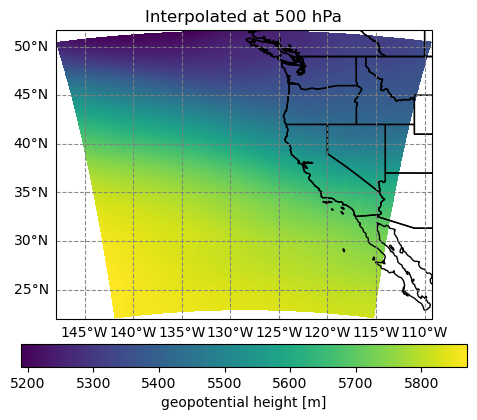

In [27]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# plot terrain height
cf = ax.pcolormesh(lon, lat, geo_interp.squeeze(), transform=ccrs.PlateCarree())


# add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.STATES)

grid = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False,
                    color='gray', alpha=0.9, linestyle='--')
grid.top_labels = False
grid.right_labels = False

cbar = fig.colorbar(cf, ax=ax, orientation='horizontal', pad=0.07, shrink=0.9)
cbar.set_label('geopotential height [m]')  # Customize label as needed

plt.title('Interpolated at 500 hPa')

plt.show()